In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpus in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    

In [2]:
# Importing the Keras libraries and packages

# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(224, 224, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Convolution2D(filters=128, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0

In [4]:
path = 'C:/Users/Tommee Ellwyn Saljay/Desktop/Neural Networks/Data'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(path + '/Train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(path + '/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary')


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

classifier.save('my_model.h5')

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 1.2822 - accuracy: 0.6016 - val_loss: 0.6691 - val_accuracy: 0.4922
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 0.6397 - accuracy: 0.6797 - val_loss: 0.6152 - val_accuracy: 0.8203
Epoch 3/10
4/4 [==============================] - 9s 2s/step - loss: 0.5653 - accuracy: 0.7812 - val_loss: 0.5201 - val_accuracy: 0.8047
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 0.4214 - accuracy: 0.7969 - val_loss: 0.3445 - val_accuracy: 0.8750
Epoch 5/10
4/4 [==============================] - 8s 2s/step - loss: 0.3391 - accuracy: 0.8281 - val_loss: 0.3091 - val_accuracy: 0.8359
Epoch 6/10
4/4 [==============================] - 8s 2s/step - loss: 0.7717 - accuracy: 0.7656 - val_loss: 0.3827 - val_accuracy: 0.8438
Epoch 7/10
4/4 [==============================] - 8s 2s/step - loss: 0.3830 - accuracy: 0.8438 - val_loss: 0.3829 - val_accuracy: 0.8516
Epoch 8/10
4/4 [========================

In [5]:
loaded_model = tf.keras.models.load_model('my_model.h5')
loaded_model.evaluate(test_set)

79/79 [==============================] - 82s 1s/step - loss: 0.2856 - accuracy: 0.9265


[0.28560543060302734, 0.9265469312667847]

In [6]:
history.history


{'loss': [1.2822082042694092,
  0.6397346258163452,
  0.5652913451194763,
  0.42144346237182617,
  0.33910471200942993,
  0.7716507315635681,
  0.3829597234725952,
  0.4094206392765045,
  0.400407075881958,
  0.38424497842788696],
 'accuracy': [0.6015625,
  0.6796875,
  0.78125,
  0.796875,
  0.828125,
  0.765625,
  0.84375,
  0.78125,
  0.828125,
  0.828125],
 'val_loss': [0.6690890192985535,
  0.6151655316352844,
  0.520141065120697,
  0.3445417881011963,
  0.3090808093547821,
  0.3826739490032196,
  0.38288694620132446,
  0.4075474143028259,
  0.423814058303833,
  0.4235357642173767],
 'val_accuracy': [0.4921875,
  0.8203125,
  0.8046875,
  0.875,
  0.8359375,
  0.84375,
  0.8515625,
  0.828125,
  0.8203125,
  0.828125]}

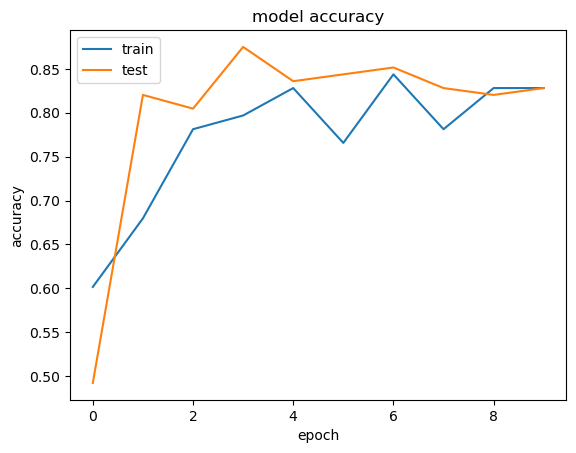

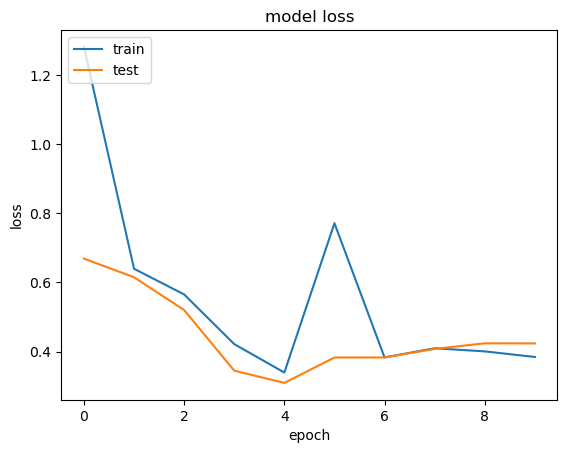

In [7]:
#plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
import numpy as np
import keras.utils as image

test_image = image.load_img('C:/Users/Tommee Ellwyn Saljay/Desktop/Neural Networks/dataset/Train/Covid/000001-7.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID'
print(prediction)

1/1 [==============================] - 0s 41ms/step
COVID


In [14]:
test_image

array([[[[ 15.,  15.,  15.],
         [ 15.,  15.,  15.],
         [ 13.,  13.,  13.],
         ...,
         [ 12.,  12.,  12.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.]],

        [[ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         ...,
         [ 12.,  12.,  12.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.]],

        [[ 15.,  15.,  15.],
         [ 16.,  16.,  16.],
         [ 16.,  16.,  16.],
         ...,
         [ 11.,  11.,  11.],
         [ 13.,  13.,  13.],
         [ 12.,  12.,  12.]],

        ...,

        [[181., 181., 181.],
         [184., 184., 184.],
         [184., 184., 184.],
         ...,
         [176., 176., 176.],
         [173., 173., 173.],
         [170., 170., 170.]],

        [[181., 181., 181.],
         [184., 184., 184.],
         [184., 184., 184.],
         ...,
         [176., 176., 176.],
         [173., 173., 173.],
         [170., 170., 170.]],

        [[180., 180., 180.],
       